Radhika Sharma Oasis Infobyte Data Science Internship Tasks

# TASK 4: Email Spam Detection With Machine Learning

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

Combatting spam emails is an ongoing challenge for individuals and organizations. Various techniques, including email filters, blacklists, and machine learning algorithms, are employed to detect and prevent spam from reaching users' inboxes. The fight against spam is crucial to maintaining online security, privacy, and user trust in digital communications.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [2]:
#Read dataset from CSV
data_spam=pd.read_csv("C:\\Users\\DELL\\Documents\\Internship\\spam.csv",encoding="latin1")
data_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#To get a concise summary of the dataset
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#To generate descriptive statistics 
data_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
#To check if dataset contains missing values or not.
data_spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#To get column names 
data_spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
#To remove missing values 
data_spam.dropna()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


In [8]:
# To remove duplicate rows
data_spam.drop_duplicates() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
#To return the total number of elements in dataset
data_spam.size

27860

In [10]:
#To get the dimensions (rows,columns) of the dataset
data_spam.shape

(5572, 5)

In [11]:
#To show column labels of the dataset
data_spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
#Deleting duplicate data
data_spam.drop_duplicates(keep = 'first', inplace = True)
data_spam.duplicated().sum()

0

In [13]:
#Rename columns 
data_spam.rename(columns = {'v1' : 'Target', 'v2':'Message'}, inplace = True)
data_spam

,Target,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
data_spam['Target'].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

In [15]:
#Number of words and characters 
data_spam['characters'] = data_spam['Message'].apply(len)

In [16]:
data_spam['words'] = data_spam['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
data_spam['sentences'] = data_spam['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
data_spam.head()

,Target,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,characters,words,sentences
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


<AxesSubplot:xlabel='characters', ylabel='Count'>

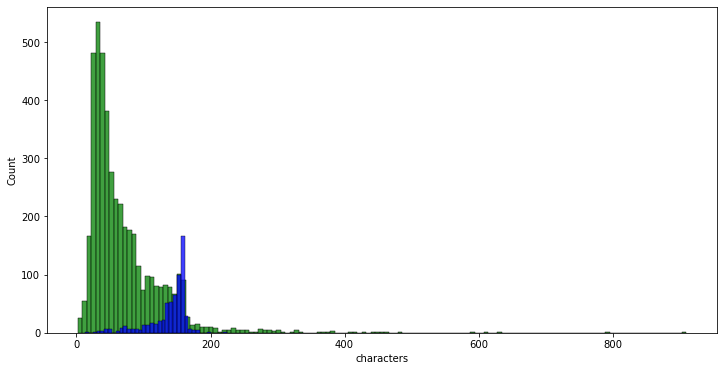

In [19]:
#histogram for characters
plt.figure(figsize=(12,6))
#ham
sns.histplot(data_spam[data_spam['Target'] == 'ham']['characters'],color='green')
#spam
sns.histplot(data_spam[data_spam['Target'] == 'spam']['characters'],color='blue')

<AxesSubplot:xlabel='words', ylabel='Count'>

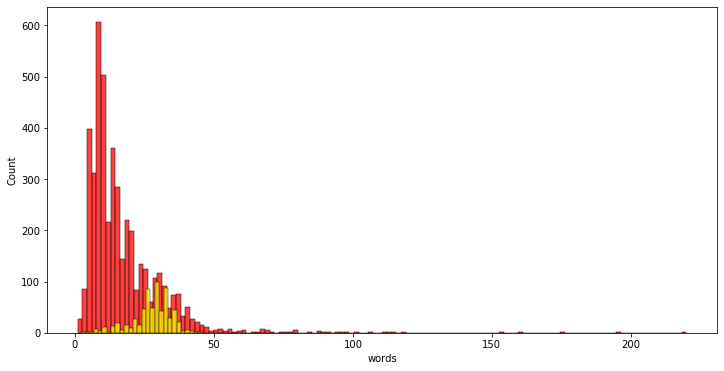

In [20]:
#histogram for words
plt.figure(figsize=(12,6))
#ham
sns.histplot(data_spam[data_spam['Target'] == 'ham']['words'],color='red')
#spam
sns.histplot(data_spam[data_spam['Target'] == 'spam']['words'],color='yellow')

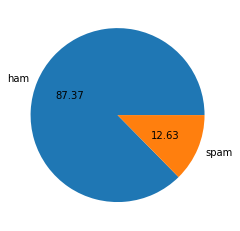

In [21]:
plt.pie(data_spam['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

<AxesSubplot:>

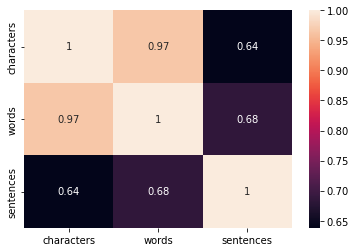

In [22]:
#HeatMap
sns.heatmap(data_spam.corr(),annot=True)

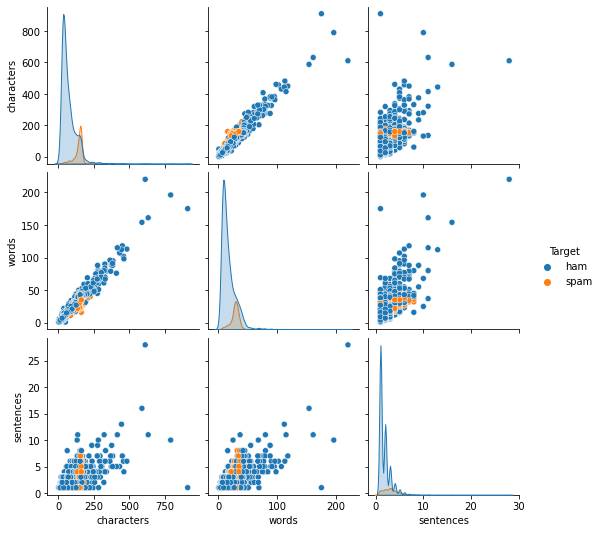

In [23]:
sns.pairplot(data_spam, hue='Target')

In [24]:
#Data Modeling
m = data_spam['Message']
t= data_spam['Target']


In [25]:
t

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5169, dtype: object

In [26]:
m

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [27]:
#Data Processing 
def alter(text):
    
    #to make lowercase
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    #removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(m,t, test_size = 0.2, random_state = 3)

In [29]:
#Logistic Regression
model_l = LogisticRegression()

In [30]:
featureextraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)
xtrainfeatures = featureextraction.fit_transform(xtrain)
xtestfeatures = featureextraction.transform(xtest)

In [31]:
model_l.fit(xtrainfeatures, ytrain)

LogisticRegression()

In [32]:
#Testing the Model
predict= model_l.predict(xtrainfeatures)
acc= accuracy_score(ytrain, predict)

In [33]:
mail = "Congratulations you are selected for internship!"  # Replace this with the actual email text

# Call the 'alter' function with the email text as input
input1 = alter(mail)

# Now 'input1' will contain the preprocessed and altered version of the email text
print(input1)

congratul you are select for internship


In [34]:
inp= featureextraction.transform([input1])
prediction=model_l.predict(inp)
if (prediction[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')
     


Non-Spam mail


In [35]:
accuracy= accuracy_score(ytrain, predict)*100
accuracy

96.90447400241838